<a href="https://colab.research.google.com/github/Yonnihayes/Machine-Learning-Models/blob/master/FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load data 
from google.colab import files
uploaded = files.upload()

Saving bs140513_032310.csv to bs140513_032310.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Detective=pd.read_csv("bs140513_032310.csv")


In [ ]:
Detective.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
Detective.tail()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


In [ ]:
Detective.describe().T

,count,mean,std,min,25%,50%,75%,max
step,594643.0,94.986827,51.053632,0.0,52.00,97.0,139.00,179.00
amount,594643.0,37.890135,111.402831,0.0,13.74,26.9,42.54,8329.96
fraud,594643.0,0.012108,0.109369,0.0,0.00,0.0,0.00,1.00


In [ ]:
Detective["fraud"].nunique()

2

In [ ]:
Detective["category"].nunique()

15

In [ ]:
Detective["category"].unique()

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [ ]:
Detective["zipcodeOri"].unique()

array(["'28007'"], dtype=object)

In [ ]:
Detective["age"]== "U"

0         False
1         False
2         False
3         False
4         False
          ...  
594638    False
594639    False
594640    False
594641    False
594642    False
Name: age, Length: 594643, dtype: bool

In [ ]:
Detective.nunique()

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

In [ ]:
Detective.isnull().any()

step           False
customer       False
age            False
gender         False
zipcodeOri     False
merchant       False
zipMerchant    False
category       False
amount         False
fraud          False
dtype: bool

In [ ]:
len(Detective)

594643

In [ ]:
Detective.groupby('fraud').size()

fraud
0    587443
1      7200
dtype: int64

In [ ]:
Detective.groupby("category").size()

category
'es_barsandrestaurants'      6373
'es_contents'                 885
'es_fashion'                 6454
'es_food'                   26254
'es_health'                 16133
'es_home'                    1986
'es_hotelservices'           1744
'es_hyper'                   6098
'es_leisure'                  499
'es_otherservices'            912
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_transportation'        505119
'es_travel'                   728
'es_wellnessandbeauty'      15086
dtype: int64

In [ ]:
Detective.groupby(['category','fraud']).last()

step       customer  ... zipMerchant   amount
category                fraud                       ...                     
'es_barsandrestaurants' 0       179  'C1088853847'  ...     '28007'     4.11
                        1       179   'C792820521'  ...     '28007'   126.64
'es_contents'           0       179   'C784046647'  ...     '28007'    15.13
'es_fashion'            0       179   'C123623130'  ...     '28007'    22.44
                        1       177  'C1382480007'  ...     '28007'    24.95
'es_food'               0       179   'C408690006'  ...     '28007'    43.04
'es_health'             0       179   'C300052027'  ...     '28007'   258.61
                        1       179  'C2033917877'  ...     '28007'   695.53
'es_home'               0       179   'C524035200'  ...     '28007'   373.36
                        1       179  'C1683902488'  ...     '28007'   608.59
'es_hotelservices'      0       179  'C1039390058'  ...     '28007'   190.31
                        1       179  'C2049382420'  ...     '28007'   132.99
'es_hyper'              0       179  'C1570165892'  ...     '28007'   100.10
                        1       178  'C1739468858'  ...     '28007'   175.86
'es_leisure'            0       139   'C179748485'  ...     '28007'    84.79
                        1       179  'C2138532527'  ...     '28007'   192.78
'es_otherservices'      0       179   'C792820521'  ...     '28007'    69.01
                        1       178   'C350034124'  ...     '28007'   789.07
'es_sportsandtoys'      0       179   'C309177915'  ...     '28007'    44.81
                        1       179    'C95082443'  ...     '28007'   518.50
'es_tech'               0       179   'C564451627'  ...     '28007'     4.26
                        1       179  'C1944878458'  ...     '28007'   538.97
'es_transportation'     0       179   'C616528518'  ...     '28007'    26.93
'es_travel'             0       176   'C179748485'  ...     '28007'   847.34
                        1       179   'C326815335'  ...     '28007'  1356.71
'es_wellnessandbeauty'  0       179   'C402758720'  ...     '28007'    60.90
                        1       179  'C2055489140'  ...     '28007'    10.16

[27 rows x 8 columns]

In [ ]:
Detective.groupby(['category','fraud']).last()

step       customer  ... zipMerchant   amount
category                fraud                       ...                     
'es_barsandrestaurants' 0       179  'C1088853847'  ...     '28007'     4.11
                        1       179   'C792820521'  ...     '28007'   126.64
'es_contents'           0       179   'C784046647'  ...     '28007'    15.13
'es_fashion'            0       179   'C123623130'  ...     '28007'    22.44
                        1       177  'C1382480007'  ...     '28007'    24.95
'es_food'               0       179   'C408690006'  ...     '28007'    43.04
'es_health'             0       179   'C300052027'  ...     '28007'   258.61
                        1       179  'C2033917877'  ...     '28007'   695.53
'es_home'               0       179   'C524035200'  ...     '28007'   373.36
                        1       179  'C1683902488'  ...     '28007'   608.59
'es_hotelservices'      0       179  'C1039390058'  ...     '28007'   190.31
                        1       179  'C2049382420'  ...     '28007'   132.99
'es_hyper'              0       179  'C1570165892'  ...     '28007'   100.10
                        1       178  'C1739468858'  ...     '28007'   175.86
'es_leisure'            0       139   'C179748485'  ...     '28007'    84.79
                        1       179  'C2138532527'  ...     '28007'   192.78
'es_otherservices'      0       179   'C792820521'  ...     '28007'    69.01
                        1       178   'C350034124'  ...     '28007'   789.07
'es_sportsandtoys'      0       179   'C309177915'  ...     '28007'    44.81
                        1       179    'C95082443'  ...     '28007'   518.50
'es_tech'               0       179   'C564451627'  ...     '28007'     4.26
                        1       179  'C1944878458'  ...     '28007'   538.97
'es_transportation'     0       179   'C616528518'  ...     '28007'    26.93
'es_travel'             0       176   'C179748485'  ...     '28007'   847.34
                        1       179   'C326815335'  ...     '28007'  1356.71
'es_wellnessandbeauty'  0       179   'C402758720'  ...     '28007'    60.90
                        1       179  'C2055489140'  ...     '28007'    10.16

[27 rows x 8 columns]

In [ ]:
Detective.columns


Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [ ]:
Detective.groupby('category')


In [ ]:
# Extracting # of unique entires per column and their sample values
num_unique = []
sample_col_values = []
for col in Detective.columns:
    num_unique.append(len(Detective[col].unique()))  # Counting number of unique values per each column
    sample_col_values.append(Detective[col].unique()[:3])  # taking 3 sample values from each column  

In [ ]:
# combining the sample values into a a=single string (commas-seperated)
# ex)  from ['hi', 'hello', 'bye']  to   'hi, hello, bye'
col_combined_entries = []
for col_entries in sample_col_values:
    entry_string = ""
    for entry in col_entries:
        entry_string = entry_string + str(entry) + ', '
    col_combined_entries.append(entry_string[:-2])

In [ ]:
# Generating a list 'paramater nature' that distinguishes features and targets
param_nature = []
for col in Detective.columns:
    if col == 'fraud':
        param_nature.append('Target')
    else:
        param_nature.append('Feature')

In [ ]:
# Generating Table1. Parameters Overview
feature_overview= pd.DataFrame(np.transpose([param_nature, num_unique, col_combined_entries]),
                                   index = Detective.columns, 
                                   columns = ['Parameter Nature', '# of Unique Entries', 'Sample Entries (First three values)'])
feature_overview

,Parameter Nature,# of Unique Entries,Sample Entries (First three values)
step,Feature,180,"0, 1, 2"
customer,Feature,4112,"'C1093826151', 'C352968107', 'C2054744914'"
age,Feature,8,"'4', '2', '3'"
gender,Feature,4,"'M', 'F', 'E'"
zipcodeOri,Feature,1,'28007'
merchant,Feature,50,"'M348934600', 'M1823072687', 'M50039827'"
zipMerchant,Feature,1,'28007'
category,Feature,15,"'es_transportation', 'es_health', 'es_otherser..."
amount,Feature,23767,"4.55, 39.68, 26.89"
fraud,Target,2,"0, 1"


In [ ]:
num_bins = 15
tran_amount = Detective['amount']
n, bins, patches = plt.hist(tran_amount, num_bins, density = False, stacked = True, facecolor= '#f26a6a', alpha=0.5)
plt.close()

In [ ]:
# Counting frequency and percentage of frad
fraud= Detective[Detective['fraud']==1]
num_transaction_total, num_transaction_fraud = len(Detective), len(fraud)
num_transaction_total, num_transaction_fraud

(594643, 7200)

In [ ]:
n_fraud = np.zeros(num_bins)
for i in range(num_bins):
    for j in range(num_transaction_fraud):
        if bins[i] < fraud['amount'].iloc[j] <= bins[i+1]:
            n_fraud[i] += 1

In [ ]:
range_amount = []
for i in range(num_bins):
    lower_lim, higher_lim = str(int(bins[i])), str(int(bins[i+1]))
    range_amount.append("$ " + lower_lim + " ~ " + higher_lim )

In [ ]:
df_hist = pd.DataFrame(index = range_amount)
df_hist.index.name = 'Transaction Amount[$]'
df_hist['# Total'] = n
df_hist['# Fraud'] = n_fraud
df_hist['# Safe'] = df_hist['# Total'] - df_hist['# Fraud']
df_hist['% Fraud'] = (df_hist['# Fraud'] / df_hist['# Total'] * 100).round(2)
df_hist['% Safe'] = (df_hist['# Safe'] / df_hist['# Total'] * 100).round(2)
df_hist

,# Total,# Fraud,# Safe,% Fraud,% Safe
Transaction Amount[$],,,,,
$ 0 ~ 555,592793.0,5430.0,587363.0,0.92,99.08
$ 555 ~ 1110,1309.0,1257.0,52.0,96.03,3.97
$ 1110 ~ 1665,143.0,121.0,22.0,84.62,15.38
$ 1665 ~ 2221,81.0,75.0,6.0,92.59,7.41
$ 2221 ~ 2776,65.0,65.0,0.0,100.00,0.00
$ 2776 ~ 3331,59.0,59.0,0.0,100.00,0.00
$ 3331 ~ 3887,48.0,48.0,0.0,100.00,0.00
$ 3887 ~ 4442,48.0,48.0,0.0,100.00,0.00
$ 4442 ~ 4997,38.0,38.0,0.0,100.00,0.00


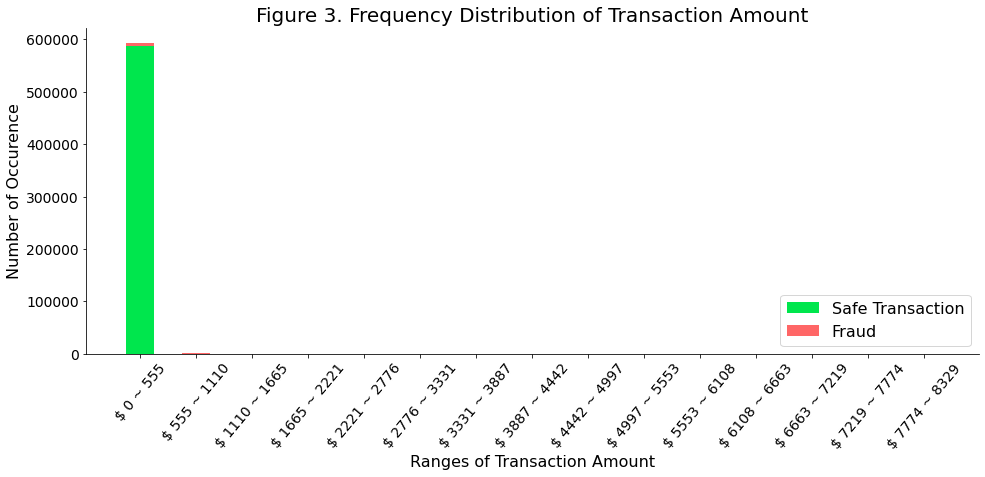

In [ ]:
fig3 = plt.figure(figsize=(16,6))

# Generating stacked bar-chart
bars_fraud = plt.bar(range(num_bins), df_hist['# Safe'], width = 0.5, color = '#00e64d')
bars_safe = plt.bar(range(num_bins), df_hist['# Fraud'], width = 0.5, bottom = df_hist['# Safe'], color='#ff6666')

# Labeling
plt.title("Figure 3. Frequency Distribution of Transaction Amount", fontsize = 20)
plt.xticks(range(num_bins), range_amount, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend((bars_fraud[0], bars_safe[0]), ('Safe Transaction', 'Fraud'), loc=4, fontsize = 16)
plt.xlabel('Ranges of Transaction Amount', fontsize=16)
plt.ylabel('Number of Occurence', fontsize=16)

# hiding top/right border
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(50)

Text(0.0, 94.08, '99%')

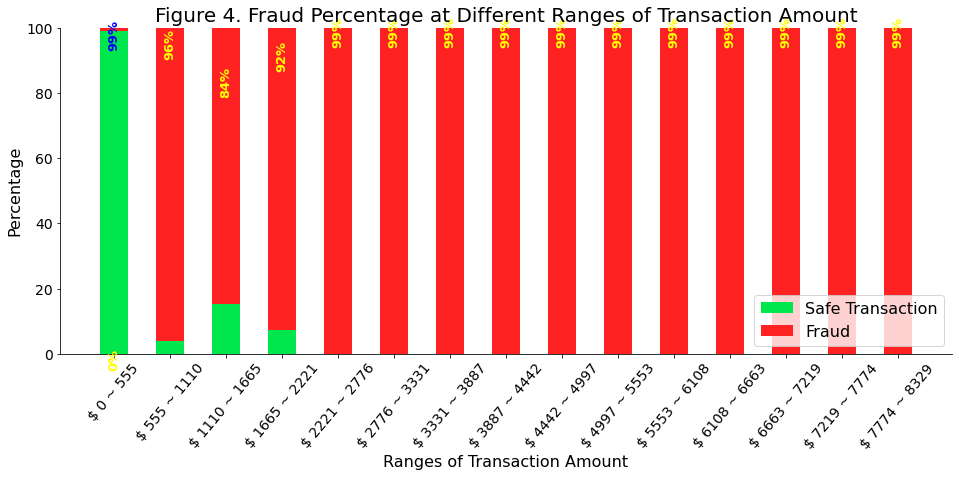

In [ ]:
fig4 = plt.figure(figsize=(16,6))

# Generating stacked bar-chart
bars_fraud = plt.bar(range(num_bins), df_hist['% Safe'], width = 0.5, color = '#00e64d')
bars_safe = plt.bar(range(num_bins), df_hist['% Fraud'], width = 0.5, bottom = df_hist['% Safe'], color='#ff2222')

# Labeling
plt.title("Figure 4. Fraud Percentage at Different Ranges of Transaction Amount", fontsize = 20)
plt.xticks(range(num_bins), range_amount, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend((bars_fraud[0], bars_safe[0]), ('Safe Transaction', 'Fraud'), loc=4, fontsize = 16)
plt.xlabel('Ranges of Transaction Amount', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.ylim(0, 100)
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(50)

# hiding top/right border
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

# bar-value display
for bar in bars_safe:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='yellow', fontsize=13, rotation = 'vertical', weight = 'bold')
plt.gca().text(bars_fraud[0].get_x() + bars_fraud[0].get_width()/2, bars_fraud[0].get_height() - 5, str(int(bars_fraud[0].get_height())) + '%', 
                 ha='center', color='blue', fontsize=13, rotation = 'vertical', weight = 'bold')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')